In [1]:
1+1

2

In [2]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Inspiration for code:

- https://developers.google.com/machine-learning/guides/text-classification/
- https://github.com/google/eng-edu/blob/master/ml/guides/text_classification/load_data.py

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import random
import time
import pickle

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

In [4]:
from helpers import load_data
from helpers import explore_data
from helpers import preprocess_data
from helpers import train_model

/home/yulia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load the data

In [5]:
main_dir = '/home/yulia/W266-Final-Project/'

In [6]:
outdata_path = main_dir+'Classification/data/splits/gender'

In [7]:
with open(os.path.join(outdata_path, 'train_list'), 'rb') as fp:
    train = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_ids'), 'rb') as fp:
    train_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_target'), 'rb') as fp:
    train_target = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_list'), 'rb') as fp:
    val = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_ids'), 'rb') as fp:
    val_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_target'), 'rb') as fp:
    val_target = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_list'), 'rb') as fp:
    test = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_ids'), 'rb') as fp:
    test_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_target'), 'rb') as fp:
    test_target = pickle.load(fp)

In [8]:
sum(train_target), sum(val_target), sum(test_target)

(94074, 31358, 31358)

### Pre-processing

In [10]:
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)

# Minimum corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 5

# Maximum proportion of corpus containing a word above which a token will be discarded.
# Helps eliminate stop words
MAX_DOCUMENT_FREQUENCY = 0.7

# Limit on the number of features. We use the top 20K features.
TOP_K = 10000

# Output number of top/bottom scoring ngrams
TOP_N = 5

vec_params = {
    'ngram_range': NGRAM_RANGE,
    'min_df': MIN_DOCUMENT_FREQUENCY,
    'max_df': MAX_DOCUMENT_FREQUENCY,
    'top_k': TOP_K,
    'top_n': TOP_N
}

In [11]:
start_time = time.time()
train_vec, val_vec, test_vec = preprocess_data.ngram_vectorize(train, train_target, val, test, **vec_params)
print("\nIt took {:.1f} seconds to vectorize data".format(time.time()-start_time))

Total vocabulary size: 980968
Number of stop words 6730190

Top 5 ngrams by differentiating score:
mr president 	 6078.0
women 	 4270.4
president 	 3985.3
rise 	 3824.2
our 	 3659.3

Bottom 5 ngrams by differentiating score:
innocence as 	 0.0
f22s 	 0.0
transportation agency 	 0.0
their historical 	 0.0
amendment whenever 	 0.0

It took 764.5 seconds to vectorize data


In [13]:
len(train), len(val), len(test)

(188148, 62716, 62716)

In [14]:
train_vec.shape, val_vec.shape, test_vec.shape

((188148, 10000), (62716, 10000), (62716, 10000))

In [15]:
vecdata_path = main_dir+'Classification/data/vectorized/gender'

In [17]:
scipy.sparse.save_npz(os.path.join(vecdata_path, 'train_vec.npz'), train_vec)
scipy.sparse.save_npz(os.path.join(vecdata_path, 'val_vec.npz'), val_vec)
scipy.sparse.save_npz(os.path.join(vecdata_path, 'test_vec.npz'), test_vec)

### Model: Multi-Layer Perceptron (Vanilla NN)

In [18]:
logs_base_dir = main_dir + 'Classification/logs/Gender'

In [19]:
ngram_model_params = {
    'model_type': 'mlp',
    'learning_rate': 1e-3,
    'epochs': 1000,
    'batch_size': 128,
    'layers': 2,
    'units': 64,
    'dropout_rate': 0.2
}

In [21]:
reload(train_model)
history, model, train_pred_probs, val_pred_probs = train_model.train_model(((train_vec, train_target), (val_vec, val_target)), logs_base_dir, **ngram_model_params)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Colocations handled automatically by placer.
Train on 188148 samples, validate on 62716 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 26s - loss: 0.5477 - acc: 0.7209 - val_loss: 0.5188 - val_acc: 0.7394
Epoch 2/1000
 - 27s - loss: 0.5091 - acc: 0.7455 - val_loss: 0.5122 - val_acc: 0.7430
Epoch 3/1000
 - 33s - loss: 0.4970 - acc: 0.7510 - val_loss: 0.5094 - val_acc: 0.7445
Epoch 4/1000
 - 38s - loss: 0.4873 - acc: 0.7571 - val_loss: 0.5063 - val_acc: 0.7489
Epoch 5/1000
 - 38s - loss: 0.4767 - acc: 0.7639 - val_loss: 0.5049 - val_acc: 0.7496
Epoch 6/1000
 - 38s - loss: 0.4644 - acc: 0.7740 - val_loss: 0.5029 - val_acc: 0.7527
Epoch 7/1000
 - 38s - loss: 0.4540 - acc: 0.7816 - val_loss: 0.5029 - val_acc: 0.7540
Epoch 8/1000
 - 38s - loss: 0.4426 - acc: 0.7900 - val_loss: 0.5000 - val_acc: 0.7554
Epoch 9/1000
 - 39s - loss

### Score/save test and validate

In [22]:
model_dir = main_dir + 'Classification/model/gender/'
model.save(model_dir+'mlp_ngram_model.h5')

In [23]:
test_pred_probs = model.predict(test_vec)
model.evaluate(test_vec, test_target, batch_size=128)

62716/62716 [==============================] - 3s 43us/sample - loss: 0.5109 - acc: 0.7516


[0.5109412771104908, 0.75161046]

In [24]:
probs_path = main_dir+'Classification/data/probs/gender/'

In [25]:
np.save(probs_path+'val_pred_probs_mlp_ngram', val_pred_probs, allow_pickle=True, fix_imports=True)
np.save(probs_path+'test_pred_probs_mlp_ngram', test_pred_probs, allow_pickle=True, fix_imports=True)

## Model Evaluation

In [26]:
val_preds = val_pred_probs > 0.5
np.sum(val_preds.flatten()==val_target)

47428

Confusion matrix, without normalization
[[23713  7645]
 [ 7643 23715]]
             precision    recall  f1-score   support

      White       0.76      0.76      0.76     31358
  Non-White       0.76      0.76      0.76     31358

avg / total       0.76      0.76      0.76     62716



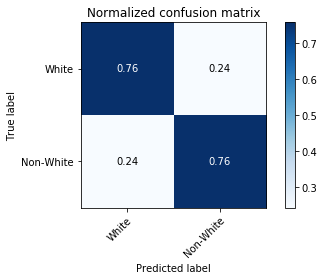

In [27]:
classes = ['White', 'Non-White']
explore_data.plot_confusion_matrix(val_target, val_preds, classes, normalize=True)

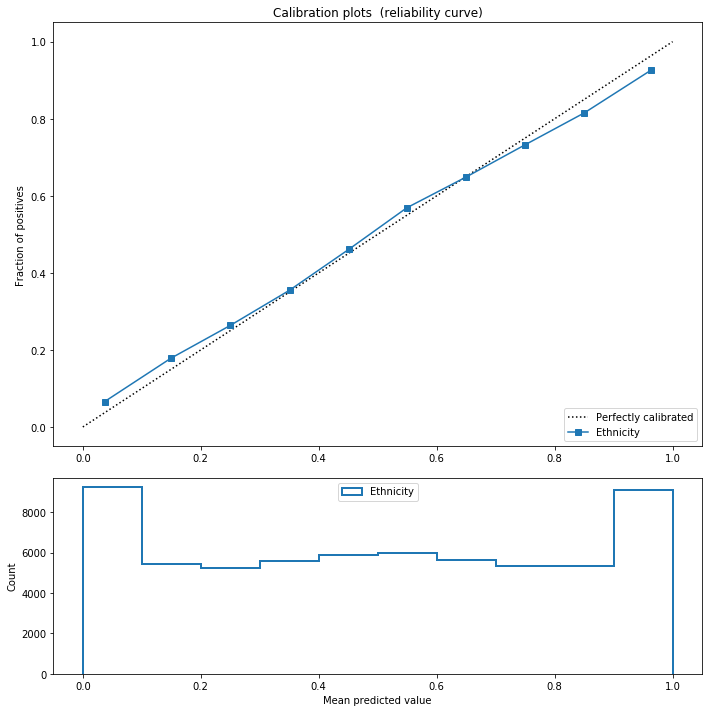

In [28]:
reload(explore_data)
explore_data.plot_calibration_curve(val_target, val_pred_probs, 'Ethnicity')